# Naive Bayes (Lab)
## Tutorial by *Nikos Gavriil*
-----------------------------------------------------------------------------------------------------------------------------

In this tutorial we will perform statistical analysis in Python using the Naive Bayes classifier. You can find another tutorial [here](https://nbviewer.jupyter.org/github/nikosga/Tutorials/blob/master/Naive%20Bayes.ipynb) with all the theoretical stuff you need to know before applying Naive Bayes for some classification task. For this tutorial we will generate some data of height and weight for some individuals and we will use Naive Bayes in order to construct a model for predicting the gender of a subset of these observations. Let's start by importing the Python modules:   

In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

We will generate 50 males and 50 females. Both height and weight will be distributed normally. For males the mean height will be 175 cm and the mean weight will be 75 kg. For females the mean height will be 160 cm and the mean weight will be 58 kg. These two characteristics for both genders will have a standard deviation of 8 points(either cm or kg). Since both features are continuous variables will we used the Gaussian Naive Bayes implementation of the scikit learn module.

In [2]:
np.random.seed(0)
heightmen = np.random.normal(175,8,50)
weightmen = np.random.normal(75,8,50)
heightwomen = np.random.normal(160,8,50)
weightwomen = np.random.normal(58,8,50)

We can organise them in a single dataframe. We will conclude a dummy variable that will indicate that the specific row belongs to a male (1) or female (0)

In [3]:
class1 = pd.DataFrame({'height':heightmen,'weight':weightmen,'sex':1})
class0 = pd.DataFrame({'height':heightwomen,'weight':weightwomen,'sex':0})
data = pd.concat((class1,class0),ignore_index=True)
#first 5 observations (male)
data.head()

,height,sex,weight
0,189.112419,1,67.836268
1,178.201258,1,78.095220
2,182.829904,1,70.913559
3,192.927146,1,65.554943
4,189.940464,1,74.774542


In [4]:
#last 5 observations (female)
data.tail()

,height,sex,weight
95,167.555836,0,56.627629
96,152.697422,0,64.174324
97,168.936130,0,64.588033
98,149.472741,0,75.305888
99,156.307323,0,68.692224


We will follow the standard process. First we define the features and the target variable. Then we will split the dataset randomly in a train and a test set. The former will be used to create the model and the latter to test it. Before training the algorithm let's plot the generated data.  

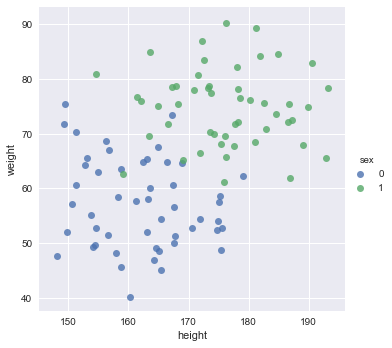

In [5]:
sns.lmplot('height','weight',data,hue='sex',fit_reg=False)

We can also plot a correlogram to spot the relationship between the three variables

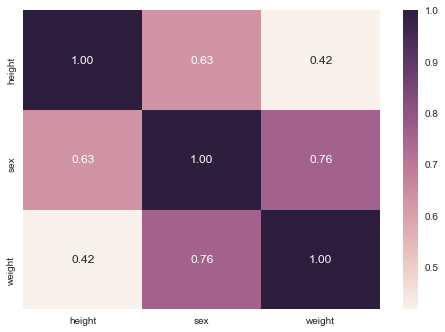

In [6]:
sns.heatmap(data.corr(),annot=True,fmt=".2f")

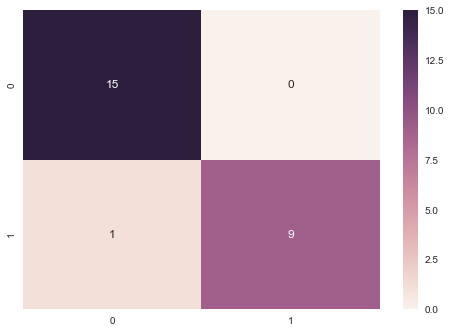

In [7]:
X = data.drop('sex',axis=1)
Y = data.sex
trainX,testX,trainY,testY = train_test_split(X,Y,random_state = 1)
model = GaussianNB()
model.fit(trainX,trainY)
predY = model.predict(testX)
#confusion matrix
sns.heatmap(confusion_matrix(testY,predY), annot=True, fmt="d")

The above matrix has in the x-axis the number of observations that were predicted either 0 or 1 while the y-axis the true gender of the observations that  were used in the test set. So in the upper left box we have 15 female cases that were predicted as female (true negative) and in the down right box we have 9 predicted males that were actually males (true positive). So the diagonal shows the correctly classified observations. In the non-diagonal we have just one misclassified observation (female that were predicted as male). So the overall accuracy (ratio of correctly classified to total observations) is:

In [8]:
accuracy_score(testY,predY)

0.95999999999999996

We can also see how the height and weight are distributed for the two sexes

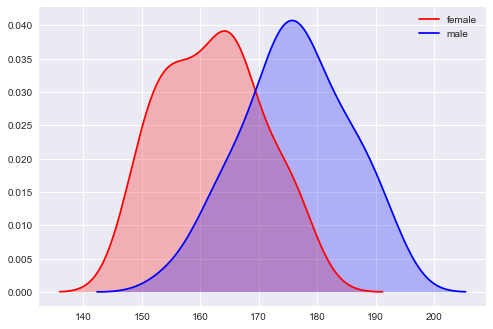

In [9]:
sns.kdeplot(data.height[data.sex==0],shade=True,color = 'r',label = 'female')
sns.kdeplot(data.height[data.sex==1],shade=True,color = 'b',label = 'male')
plt.show()

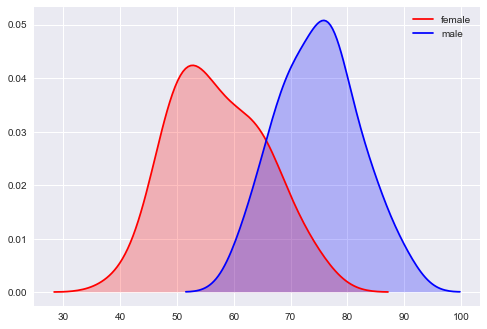

In [10]:
sns.kdeplot(data.weight[data.sex==0],shade=True,color = 'r',label = 'female')
sns.kdeplot(data.weight[data.sex==1],shade=True,color = 'b',label = 'male')
plt.show()